In [1]:
#import supporting libraries
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
import matplotlib.cm as cm
from matplotlib.pyplot import imread
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
#load in the training data in the desired format
X_train_labels, X_train_data = [], []
for line in open('./faces/train.txt'):
    im = imread(line.strip().split()[0])
    X_train_data.append(im.reshape(2500,))
    X_train_labels.append(line.strip().split()[1])
X_train_data, X_train_labels = np.array(X_train_data, dtype=float), np.array(X_train_labels, dtype=int)

In [3]:
#load in the test data in the desired format
X_test_labels, X_test_data = [], []
for line in open('./faces/test.txt'):
    im = imread(line.strip().split()[0])
    X_test_data.append(im.reshape(2500,))
    X_test_labels.append(line.strip().split()[1])
X_test_data, X_test_labels = np.array(X_test_data, dtype=float), np.array(X_test_labels, dtype=int)

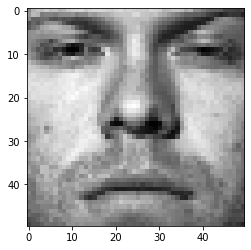

In [4]:
#display face image from X
plt.imshow(X_train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

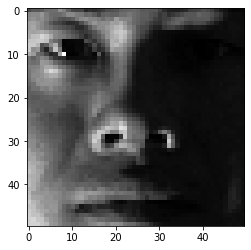

In [5]:
#display face image from Xtest
plt.imshow(X_test_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

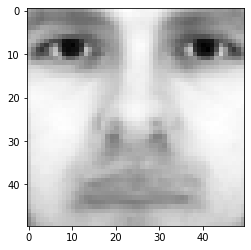

In [6]:
#display average face mu
average_train_face = np.mean(X_train_data, axis = 0)
plt.imshow(average_train_face.reshape(50,50), cmap = cm.Greys_r)
plt.show()

In [7]:
#subtract average face mu from train and test data
X_train_mean_subtraction = np.subtract(X_train_data, average_train_face)
X_test_mean_subtraction = np.subtract(X_test_data, average_train_face)

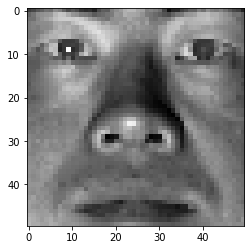

In [8]:
#display image from X_train_mean_subtraction
plt.imshow(X_train_mean_subtraction[100, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

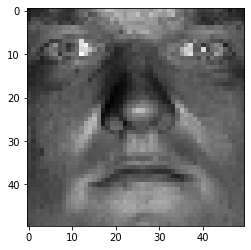

In [9]:
#display image from X_test_mean_subtraction
plt.imshow(X_test_mean_subtraction[60, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

In [10]:
#perform SVD on the training data set 
#use np.linalg.svd which returns the three components of SVD
u, sigma, v_transpose = np.linalg.svd(X_train_data, full_matrices=True)

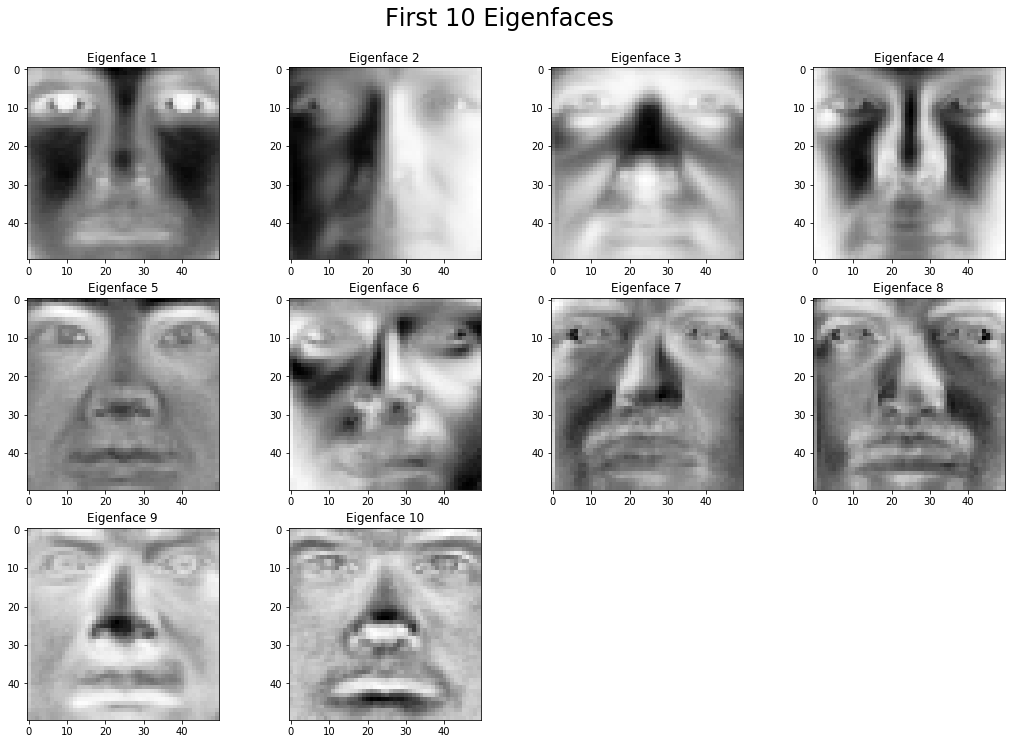

In [11]:
#create figure and subplots to display the first 10 Eigenfaces as images
fig = plt.figure(figsize=(18,12))
fig.suptitle('First 10 Eigenfaces', fontsize=24, y = 0.95)

for i in range(10):
    plt.subplot(3, 4, i+1)
    plt.imshow(v_transpose[i, :].reshape(50,50), cmap = cm.Greys_r)
    title = 'Eigenface ' + str(i + 1)
    plt.title(title)

plt.show()

In [12]:
#low rank approximation
#calculate and plot the r approximation error for r = 1 to 200
#use the SVD components up to r to do so
errors = []
for r in range(1,201):
    rank_approximation = np.dot(np.dot(u[:,:r], np.diag(sigma)[:r,:r]), v_transpose[:r,:])
    frob_matrix = np.subtract(X_train_data, rank_approximation)
    errors.append(np.linalg.norm(frob_matrix, 'fro'))

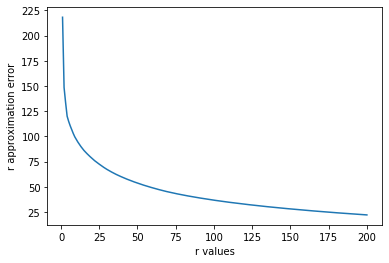

In [13]:
#plot r values 1-200 on the x-axis and the r-approximation error on the y-axis
r_values = np.arange(1,201)
plt.plot(r_values,errors)
plt.xlabel('r values')
plt.ylabel('r approximation error')
plt.show()

In [14]:
#define a function eigenface that receives train and test data and an r value
#perform SVD on the training and test sets 
#calculate F and Ftest by calculating the dot product of the train/test data respectively and vt transposed
def eigenface(data_train, data_test, r):
    u, s, vt = np.linalg.svd(data_train, full_matrices=True)
    Ftrain = np.dot(data_train, np.transpose(vt[:r,:]))
    u2, s2, vt2 = np.linalg.svd(data_test, full_matrices=True)
    Ftest = np.dot(data_test, np.transpose(vt[:r,:]))
    return Ftrain, Ftest

In [15]:
#calculate the logistic regression accuracy score for each r from 1-200
#create an empty array to store the scores
#call eigenface to get F and Ftest and then use logistic regression to train on F with X train labels and then predict for Ftest
iteration_score = []

for i in range(1,201):
    ftrain, ftest = eigenface(X_train_data, X_test_data, i)
    lr_model = LogisticRegression(random_state=0, multi_class='ovr', solver = 'lbfgs', max_iter = 10000)
    lr_fit_model = lr_model.fit(ftrain, X_train_labels)
    f_predicted_labels = lr_fit_model.predict(ftest)
    
    iteration_score.append(accuracy_score(X_test_labels, f_predicted_labels))

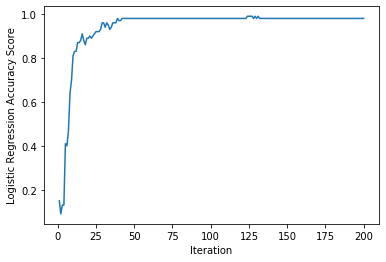

In [16]:
#plot the results for logistic regression accuracy scores for r = 1 to 200
iterations = np.arange(1,201)
plt.plot(iterations,iteration_score)
plt.xlabel('Iteration')
plt.ylabel('Logistic Regression Accuracy Score')
plt.show()